# DistribuNim I

## Problem Statement

Two players play a game with two piles of stones. The players alternately take stones from one or both piles, subject to:

<ol>
<li>the total number of stones taken is equal to the size of the smallest pile before the move;</li>

<li>the move cannot take all the stones from a pile.</li>
</ol>


The player that is unable to move loses.

For example, if the piles are of sizes 3 and 5 then there are three possible moves.
$$(3,5) \xrightarrow{(2,1)} (1,4)\qquad\qquad (3,5) \xrightarrow{(1,2)} (2,3)\qquad\qquad (3,5) \xrightarrow{(0,3)} (3,2)$$


Let $L(n)$ be the number of ordered pairs $(a,b)$ with $1 \leq a,b \leq n$ such that the initial game position with piles of sizes $a$ and $b$ is losing for the first player assuming optimal play.

You are given $L(7) = 21$ and $L(7^2) = 221$.

Find $L(7^{17})$.

## Solution

As a first step, let's simulate the game for small values of $n$ and find the number of losing positions. We do so with a memoized recursive function. A few remarks:
- When the values of $a$ and $b$ are both equal to 1, the game is lost
- When $a = b$, it is not possible to remove zero stones from one of the piles
- obviously, if $(a, b)$ is a winning pair, then $(b, a)$ is winning too

In [1]:
from functools import cache
import matplotlib.pyplot as plt

In [2]:
## Note the function below looks for WINNING positions whereas we need to look for LOSING positions

@cache
def solve(a, b, player):
    # Get the low and high value
    mini = min(a, b)
    maxi = max(a, b)
    # If a == b, it is not possible to remove 0 from a pile
    start = 0
    if a == b:
        start = 1
    # Player 1
    if player == 1:
        # Game is lost
        if a == 1 and b == 1:
            return False
        # Check if a split leads to a sure win
        for x in range(start, mini):
            y = mini - x
            if solve(mini - x, maxi - y, 2):
                return True
        # If no split leads to a win, game is lost
        return False
    # Player 2
    elif player == 2:
        # Game is lost
        if a == 1 and b == 1:
            return True
        # Check if a split leads to a loss for the other player
        for x in range(start, mini):
            y = mini - x
            if not solve(mini - x, maxi - y, 1):
                return False
        # If no split leads to a loss for player 1, then player 1 wins
        return True

def count_losing_positions(n):
    count = 0 # counter for the result
    for a in range(1, n + 1):
        for b in range(a, n + 1):
            # Note the `not` is used because the function looks for winning positions instead of losing ones
            # If a == b and position is losing, incremenet count by 1
            if a == b:
                count += not solve(min(a, b), max(a, b), 1)
            # If a != b, counter is incremented by 2 to account for (a, b) and (b, a)
            else:
                count += 2 * (not solve(min(a, b), max(a, b), 1))
    return count

print(f'Count of losing positions for n = 7 is {count_losing_positions(7)}.')
print(f'Count of losing positions for n = 49 is {count_losing_positions(49)}.')

Count of losing positions for n = 7 is 21.
Count of losing positions for n = 49 is 221.


Now that we have a function that accurately counts the number of losing positions for a given $n$, let's compute this number for $1 \leq n \leq 300$ and see if we observe some kind of pattern.

In [3]:
res = [0] * 301
for i in range(301):
    res[i] = count_losing_positions(i)

res

[0,
 1,
 1,
 6,
 6,
 8,
 8,
 21,
 21,
 23,
 23,
 29,
 29,
 31,
 31,
 60,
 60,
 62,
 62,
 68,
 68,
 70,
 70,
 84,
 84,
 86,
 86,
 92,
 92,
 94,
 94,
 155,
 155,
 157,
 157,
 163,
 163,
 165,
 165,
 179,
 179,
 181,
 181,
 187,
 187,
 189,
 189,
 219,
 219,
 221,
 221,
 227,
 227,
 229,
 229,
 243,
 243,
 245,
 245,
 251,
 251,
 253,
 253,
 378,
 378,
 380,
 380,
 386,
 386,
 388,
 388,
 402,
 402,
 404,
 404,
 410,
 410,
 412,
 412,
 442,
 442,
 444,
 444,
 450,
 450,
 452,
 452,
 466,
 466,
 468,
 468,
 474,
 474,
 476,
 476,
 538,
 538,
 540,
 540,
 546,
 546,
 548,
 548,
 562,
 562,
 564,
 564,
 570,
 570,
 572,
 572,
 602,
 602,
 604,
 604,
 610,
 610,
 612,
 612,
 626,
 626,
 628,
 628,
 634,
 634,
 636,
 636,
 889,
 889,
 891,
 891,
 897,
 897,
 899,
 899,
 913,
 913,
 915,
 915,
 921,
 921,
 923,
 923,
 953,
 953,
 955,
 955,
 961,
 961,
 963,
 963,
 977,
 977,
 979,
 979,
 985,
 985,
 987,
 987,
 1049,
 1049,
 1051,
 1051,
 1057,
 1057,
 1059,
 1059,
 1073,
 1073,
 1075,
 1075,


We observe that for any odd index $i$, the number of losing positions is equal to the one at index $i + 1$. In order to simplify the study of the pattern, let's remove the even indices. Then, we plot the remaining values.

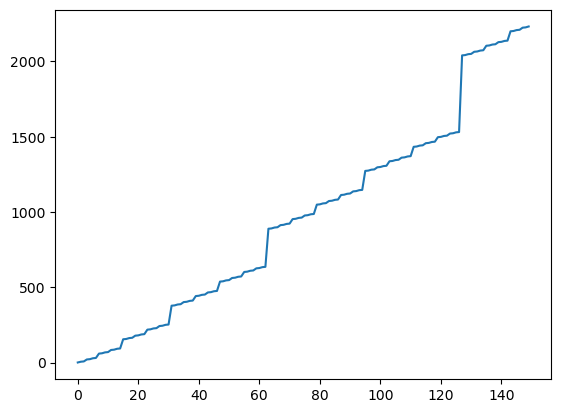

In [4]:
res = [res[i] for i in range(1, len(res), 2)]

plt.plot(res)

From the plot, we see that there is some kind of pattern. Let's look at the differences. 

In [5]:
res

[1,
 6,
 8,
 21,
 23,
 29,
 31,
 60,
 62,
 68,
 70,
 84,
 86,
 92,
 94,
 155,
 157,
 163,
 165,
 179,
 181,
 187,
 189,
 219,
 221,
 227,
 229,
 243,
 245,
 251,
 253,
 378,
 380,
 386,
 388,
 402,
 404,
 410,
 412,
 442,
 444,
 450,
 452,
 466,
 468,
 474,
 476,
 538,
 540,
 546,
 548,
 562,
 564,
 570,
 572,
 602,
 604,
 610,
 612,
 626,
 628,
 634,
 636,
 889,
 891,
 897,
 899,
 913,
 915,
 921,
 923,
 953,
 955,
 961,
 963,
 977,
 979,
 985,
 987,
 1049,
 1051,
 1057,
 1059,
 1073,
 1075,
 1081,
 1083,
 1113,
 1115,
 1121,
 1123,
 1137,
 1139,
 1145,
 1147,
 1273,
 1275,
 1281,
 1283,
 1297,
 1299,
 1305,
 1307,
 1337,
 1339,
 1345,
 1347,
 1361,
 1363,
 1369,
 1371,
 1433,
 1435,
 1441,
 1443,
 1457,
 1459,
 1465,
 1467,
 1497,
 1499,
 1505,
 1507,
 1521,
 1523,
 1529,
 1531,
 2040,
 2042,
 2048,
 2050,
 2064,
 2066,
 2072,
 2074,
 2104,
 2106,
 2112,
 2114,
 2128,
 2130,
 2136,
 2138,
 2200,
 2202,
 2208,
 2210,
 2224,
 2226,
 2232]

In [6]:
diff = [res[i] - res[i-1] for i in range(1, len(res))]
diff = [1] + diff
diff

[1,
 5,
 2,
 13,
 2,
 6,
 2,
 29,
 2,
 6,
 2,
 14,
 2,
 6,
 2,
 61,
 2,
 6,
 2,
 14,
 2,
 6,
 2,
 30,
 2,
 6,
 2,
 14,
 2,
 6,
 2,
 125,
 2,
 6,
 2,
 14,
 2,
 6,
 2,
 30,
 2,
 6,
 2,
 14,
 2,
 6,
 2,
 62,
 2,
 6,
 2,
 14,
 2,
 6,
 2,
 30,
 2,
 6,
 2,
 14,
 2,
 6,
 2,
 253,
 2,
 6,
 2,
 14,
 2,
 6,
 2,
 30,
 2,
 6,
 2,
 14,
 2,
 6,
 2,
 62,
 2,
 6,
 2,
 14,
 2,
 6,
 2,
 30,
 2,
 6,
 2,
 14,
 2,
 6,
 2,
 126,
 2,
 6,
 2,
 14,
 2,
 6,
 2,
 30,
 2,
 6,
 2,
 14,
 2,
 6,
 2,
 62,
 2,
 6,
 2,
 14,
 2,
 6,
 2,
 30,
 2,
 6,
 2,
 14,
 2,
 6,
 2,
 509,
 2,
 6,
 2,
 14,
 2,
 6,
 2,
 30,
 2,
 6,
 2,
 14,
 2,
 6,
 2,
 62,
 2,
 6,
 2,
 14,
 2,
 6]

Analyzing the differences, we can make a few observations. To visualise, let's split the sequence into several relevant subsequences.

`[1]` \
`[5, 2]` \
`[13, 2, 6, 2]` \
`[29, 2, 6, 2, 14, 2, 6, 2]` \
`[61, 2, 6, 2, 14, 2, 6, 2, 30, 2, 6, 2, 14, 2, 6, 2]` 

A few observations:
- The difference between the first value of each subsequence is an increasing power of 2 ($5-1 = 2^2, 13 - 5 = 2^3, 29 - 13 = 2^4$, etc).
- In each subsequence, the first value is followed by all the values of the concatenated previous subsequences. The only difference is that the first value of the previous subsequence is increased by one.
- The number of values in subsequence $i$ is equal to $2^{i-1}$. Therefore, the cumulative number of values up (and including) subsequence $i$ is given by $\sum_{k = 1}^{i} 2^{k-1}$.
- The sum of the values in subsequence $i$ is the $i$-th Woodall number, $W_i$, where $W_i = i 2^i - 1$. Therefore, the cumulative sum up to (and including) subsequence $i$ is given by $\sum_{k=1}^i W_k$.

We now have a clear pattern. However, for a large value on $n$, it is not possible to generate the full pattern. Therefore, we will use the two last oberservations to figure out the number iteratively. 

We are looking for the answer for $n = 7^{17}$. Because our subsequences do not contain the duplicates that are present in the actual sequence, we will look for the value at $n = \left \lfloor \frac{7^{17} + 1}{2} \right \rfloor$.

First, we initialize 2 variables:
- `n` to store the length of the remaining sequence to be processed. Initially, $n = \left \lfloor \frac{7^{17} + 1}{2} \right \rfloor$.
- `total` to store the total value of the sequence that has been processed. Initially, it is equal to zero.

Starting from our `n` value, we will do the following:
- Check how many full subsequences can fit in `n` using the third observation above and subtract this number from `n`. Let the number of subsequences be $x$.
- Compute the cumulative value of all those subsequences and add it to the `total`.
- If it is not the initial pass, add $x$ to the total to account for the 1 added to the first values of the subsequences.
- If `n` is equal to zero:
    - we have fully processed all the values and we return the total 
- Otherwise:
    - Get the first value of the next sequence and add it to `total` and subtract 1 from `n`. If it is not the first pass, add 1 the total to account for the 1 increment.
- Repeat all the steps above until `n` is equal to zero and return the total.

Basically, we are adding the sums of a smaller and smaller number of subsequences until we have processed all $n$ values.

In [7]:
def get_number_of_processed_values(n):
    i = 0
    count = 0
    while count + 2**i <= n:
        count += 2**i
        i += 1
    return (i, count)

def get_total_from_x_subsequences(x):
    cum = 0
    for i in range(1, x + 1):
        cum += i * 2**i - 1
    return cum

def get_first_value(n):
    cum = 1
    for i in range(1, n):
        cum += 2**(i + 1)
    return cum

def get_number_of_losing_positions(n):
    total = 0
    first_pass = True
    while n > 0:
        x, iter = get_number_of_processed_values(n)
        n -= iter
        total += get_total_from_x_subsequences(x)
        if not first_pass:
            total += x
        if n == 0:
            break
        n -= 1
        total += get_first_value(x + 1)
        if not first_pass:
            total += 1
        first_pass = False
    return total

n = (7**17 + 1) // 2
get_number_of_losing_positions(n)

10784223938983273